In [1]:
setwd('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1001. InVitroWildfire EVProteomics/P1001.3. Analyses/P1001.3.6. Volcano Plot/Input')
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1001. InVitroWildfire EVProteomics/P1001.3. Analyses/P1001.3.6. Volcano Plot/Output')
cur_date = "042322"

library(readxl)
library(tidyverse)
library(reshape2)
library(ggrepel)
library(MetBrewer)

#reading in file
protein_df = data.frame(read_excel("042322_Statistical_Results_Only.xlsx"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
head(protein_df)

,Set,Treatment,Protein,log2FC,Statistic,P.Value,P.Adj
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Set1,CoCulture,P19012,0.3539417,0.6033149,0.5672249,0.8207093
2,Set1,CoCulture,P19013,-0.1250127,-0.1394369,0.8938424,0.9672176
3,Set1,CoCulture,O43897,-0.3537176,-1.2881706,0.2415972,0.7149305
4,Set1,CoCulture,P20700,-0.1311273,-0.4011018,0.6984561,0.8649296
5,Set1,CoCulture,P22102,0.8732620,1.0907687,0.3118780,0.7329387
6,Set1,CoCulture,O75367,-0.3787917,-0.6036463,0.5633036,0.8186874


In [3]:
# adding a col to denote whether a protein had increased or decreased expression

# add a column of NAs
protein_df$diffexpressed <- "No"

# if log2FC > 0.6 and P.Adj < 0.05, set as "UP" 
protein_df$diffexpressed[protein_df$log2FC > 0.6 & protein_df$P.Adj < 0.05] <- "Up"

# if log2FC < -0.6 and P.Adj < 0.05, set as "DOWN"
protein_df$diffexpressed[protein_df$log2FC < -0.6 & protein_df$P.Adj < 0.05] <- "Down"

protein_df$diffexpressed = factor(protein_df$diffexpressed, levels = c("No", "Up", "Down"))

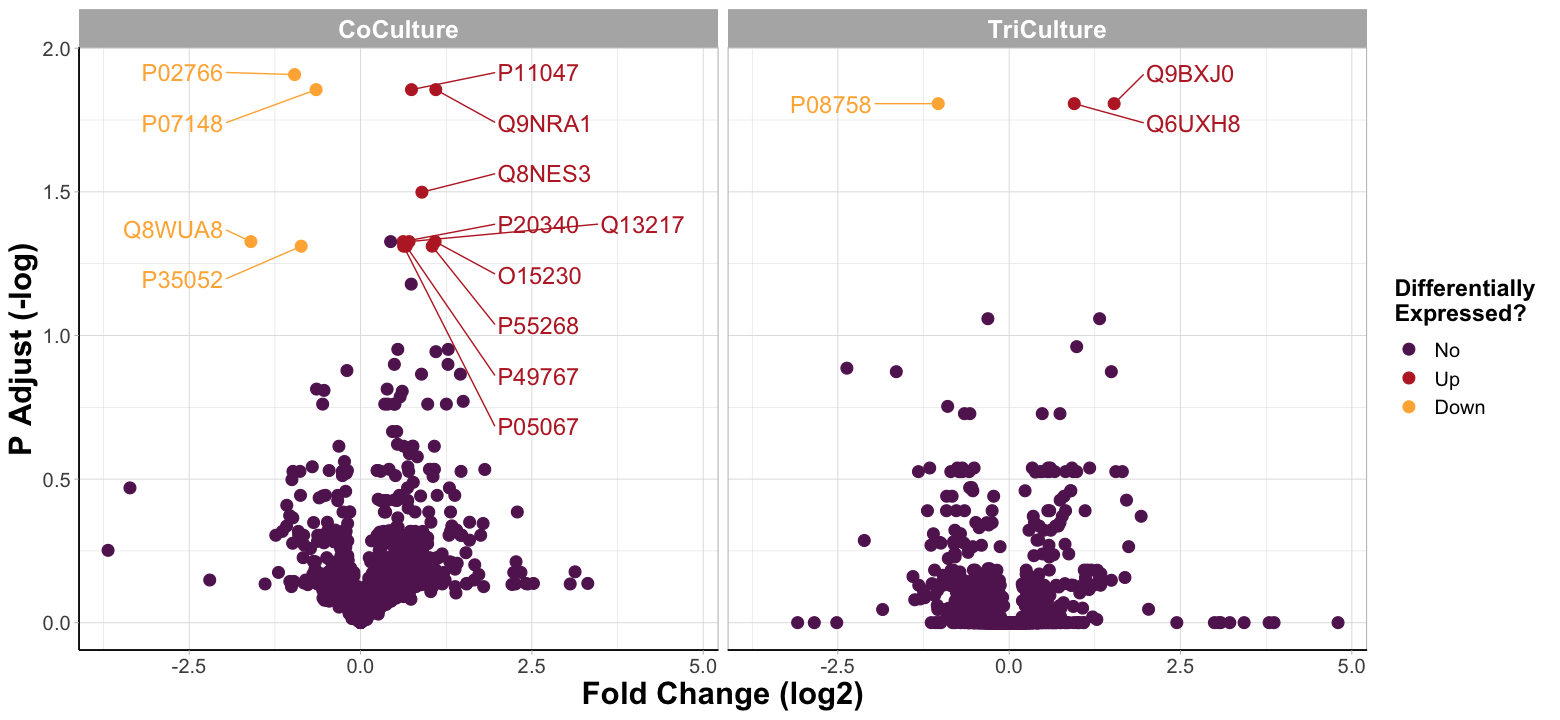

In [32]:
options(repr.plot.width=13, repr.plot.height=6) #changing size

#choosing palette from package
metbrewer_colors = MetPalettes$Tam[[1]]

ggplot() + 
  geom_point(data = protein_df, aes(x = log2FC, y = -log10(P.Adj), color = diffexpressed), size = 3) + 
  #geom_hline(data = protein_df, aes(yintercept = -log10(0.05)), linetype = "dotdash") + 

  #labeling points with statistical significance and FC
  geom_text_repel(data = protein_df %>%
                      filter(abs(log2FC) > 0.6 & P.Adj < 0.05 & diffexpressed == "Up"), 
    aes(x = log2FC, y = -log10(P.Adj), label = Protein, color = diffexpressed),
    xlim = c(2, NA),
    hjust = 0,
    segment.size = 0.4,
     box.padding = 0.7,
     max.overlaps = Inf,
    size = 5, 
    show.legend = FALSE) + 

  geom_text_repel(data = protein_df %>%
                      filter(abs(log2FC) > 0.6 & P.Adj < 0.05 & diffexpressed == "Down"), 
    aes(x = log2FC, y = -log10(P.Adj), label = Protein, color = diffexpressed),
    xlim = c(NA, -2),
    hjust = 1,
    segment.size = 0.4,
     box.padding = 0.7,
     max.overlaps = Inf,
    size = 5, 
    show.legend = FALSE) + 

  facet_wrap(~Treatment) + 

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        #legend.position = "none", # remove legend
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = 'Fold Change (log2)', y = 'P Adjust (-log)') + 

  scale_color_manual(name = "Differentially \nExpressed?",
                      values = c(metbrewer_colors[7], metbrewer_colors[5], metbrewer_colors[2]))